In [67]:
#Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
warnings.filterwarnings('ignore')

In [28]:
#Getting our train data
df = pd.read_csv('churn_view.csv')
df.sample(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
4262,48692-GUJ,Female,18,No,Gujarat,6,12,NaN,No,No,...,Credit Card,60.80,3603.45,0.0,0,0.00,3603.45,Stayed,Others,Others
3533,32236-KER,Male,33,Yes,Kerala,6,35,Deal 4,Yes,No,...,Credit Card,59.65,638.95,0.0,90,14.80,743.75,Stayed,Others,Others
1922,88255-MAH,Male,48,No,Maharashtra,7,28,Deal 3,No,No,...,Credit Card,33.75,1009.25,0.0,0,0.00,1009.25,Stayed,Others,Others
5556,29416-JAM,Female,28,Yes,Jammu & Kashmir,15,5,NaN,Yes,Yes,...,Mailed Check,89.85,2165.05,0.0,0,671.28,2836.33,Churned,Competitor,Competitor made better offer
4990,33718-MAH,Male,32,Yes,Maharashtra,1,3,Deal 1,Yes,Yes,...,Credit Card,80.10,5585.40,0.0,0,778.87,6364.27,Stayed,Others,Others


In [29]:
df.shape

(6007, 32)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [31]:
#Viewing the target columns distribution
df['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Name: count, dtype: int64

So the dataset is clearly imbalanced

In [32]:
#Dropping some unimportant columns
df.drop(['Customer_ID','Churn_Category','Churn_Reason','Value_Deal'],axis=1,inplace=True)

In [33]:
df.sample(5)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
1579,Male,70,No,Haryana,11,9,Yes,Yes,Yes,Fiber Optic,...,One Year,No,Bank Withdrawal,86.80,1975.85,0.0,0,979.57,2955.42,Stayed
3849,Female,33,Yes,Assam,6,10,Yes,No,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,104.40,1081.45,0.0,0,83.80,1165.25,Churned
4216,Female,65,No,Kerala,15,1,Yes,No,Yes,DSL,...,Month-to-Month,No,Bank Withdrawal,76.50,1155.60,0.0,0,596.55,1752.15,Stayed
2871,Female,71,Yes,Jammu & Kashmir,6,27,Yes,Yes,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,84.75,1350.15,0.0,0,280.16,1630.31,Churned
4990,Male,32,Yes,Maharashtra,1,3,Yes,Yes,Yes,DSL,...,Two Year,Yes,Credit Card,80.10,5585.40,0.0,0,778.87,6364.27,Stayed


In [92]:
#Splitting our data into input variables and output variable
X = df.drop(['Customer_Status'],axis=1)
y = df['Customer_Status']

In [93]:
#Encoding our input's categorical variables
X = pd.get_dummies(X, columns= ['Gender','Married','State','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Security','Online_Backup',
                                'Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract',
                                'Paperless_Billing','Payment_Method'],drop_first = True,dtype=float)


In [49]:
#Encoding our target variable
le = LabelEncoder()
y = le.fit_transform(y)

Since our dataset is imbalanced so we will use BalancedRandomForestClassifier

In [51]:
#Doing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
#Preparing our model
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Test Score = 0.8136439267886856
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       425
           1       0.83      0.90      0.86       777

    accuracy                           0.81      1202
   macro avg       0.80      0.78      0.79      1202
weighted avg       0.81      0.81      0.81      1202



<Axes: >

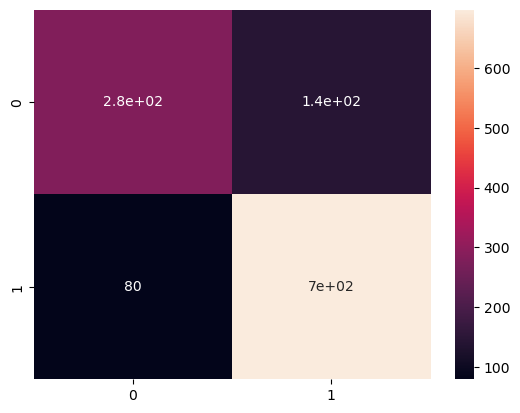

In [64]:
#Evaluating our model
print('Test Score =' , accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

Let us tune the model a bit to achieve better result

In [65]:
#Giving different hyperparameters
model_params = {
    'balanced random_forest': {
        'model': BalancedRandomForestClassifier(),
        'params' : {
            'n_estimators': [100,150],
            'criterion' : ['gini','entropy'],
            'n_jobs' : [-1],
            'random_state' : [42],
            'max_depth' : [6,8,10]
        }
    }
}

In [68]:
#Applying GridSearchCV for tuning
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,balanced random_forest,0.821544,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."


In [73]:
#Viewing the parameters
for i in score_df.best_params:
    print(i)

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


In [84]:
#Finalizing our tuned model
tuned_model = BalancedRandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 100, n_jobs= -1, random_state= 42)
tuned_model.fit(X_train,y_train)

BalancedRandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

Now we are making our prediction for the newly joined customers by using the joined dataset

In [85]:
#Loading the dataset
joined_df = pd.read_csv('joined_view.csv')

#Making a copy to make the dataset for powerbi analysis
analysis_data = joined_df.copy()

#Droping unimportant columns
joined_df.drop(['Customer_ID','Churn_Category','Churn_Reason','Value_Deal','Customer_Status'],axis=1,inplace=True)

#Encoding our categorical variables
joined_df = pd.get_dummies(joined_df, columns= ['Gender','Married','State','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Security','Online_Backup',
                                'Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract',
                                'Paperless_Billing','Payment_Method'],drop_first = True,dtype=float)

#Making our prediction
joined_prediction = tuned_model.predict(joined_df)

#Adding predictions to the analysis dataset
analysis_data['Customer_Status_Prediction'] = joined_prediction

#Filtering the dataset for only those customers who are predicted as Churned
analysis_data = analysis_data[analysis_data['Customer_Status_Prediction'] == 1]

In [90]:
#Saving the dataset
analysis_data.to_csv(r"/Desktop/churn")

OSError: Cannot save file into a non-existent directory: '\Desktop'